## **Wireless Communications Python Assignment 2**
### K Chaitanya Sadhan
### 231040059



## **Question 1**

Text(0, 0.5, 'BER')

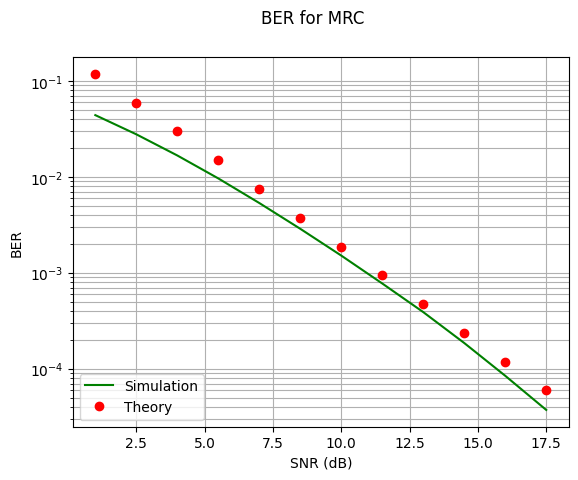

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr
from scipy.special import comb


blockLength = 1000; # Number of symbols per block
nBlocks = 10000; # Number of blocks
L = 2; # Number of antennas
EbdB = np.arange(1.0,18.1,1.5); # Energy per bit in dB
Eb = 10**(EbdB/10); # Energy per bit Eb
No = 1; # Total noise power No
SNR = 2*Eb/No; # Signal-to-noise power ratio
SNRdB = 10*np.log10(Eb/No); # SNR values in dB
BER = np.zeros(len(EbdB)); # Bit error rate (BER) values
BERt = np.zeros(len(EbdB)); # Analytical values of BER from formula


for blk in range(nBlocks):
    # Rayleigh fading channel coefficient with average power unity
    h = (nr.normal(0.0, 1.0,(L,1))+1j*nr.normal(0.0, 1.0,(L,1)))/np.sqrt(2);
    # Complex Gaussian noise with power No
    noise = nr.normal(0.0, np.sqrt(No/2), (L,blockLength))+1j*nr.normal(0.0, np.sqrt(No/2), (L,blockLength));
    BitsI = nr.randint(2,size=blockLength); # Bits for I channel
    BitsQ = nr.randint(2,size=blockLength); # Bits for Q channel
    Sym = (2*BitsI-1)+1j*(2*BitsQ-1); # Complex QPSK symbols

    for K in range(len(SNRdB)):
        #alloting the power to the symbols.
        TxSym = np.sqrt(Eb[K])*Sym

        #received symbols is multiplied by channel and added with AWGN.
        RxSym = h*TxSym + noise

        #Performing MRC Combining operation
        MRCout = np.sum(np.conj(h)*RxSym, axis = 0);

        #Decoding the Received Bits(Inphase and Outphase) with the threshold 0.
        DecBitsI = (np.real(MRCout)>0)
        DecBitsQ = (np.imag(MRCout)>0)

        #finding the number of bits in error
        BER[K] = BER[K] + np.sum(DecBitsI != BitsI) + np.sum(DecBitsQ != BitsQ)




BER = BER/blockLength/nBlocks/2; # Evaluating BER from simulation
BERt = comb(2*L-1, L)/2**L/SNR**L; # Evaluating BER from formula





# Plotting the bit error rate from Simulation and formula
plt.yscale('log')
plt.plot(SNRdB, BER,'g-');
plt.plot(SNRdB, BERt,'ro');
plt.grid(1,which='both')
plt.suptitle('BER for MRC')
plt.legend(["Simulation", "Theory"], loc ="lower left");
plt.xlabel('SNR (dB)')
plt.ylabel('BER')














#**Observations:**


*   **As SNR is increasing BER decreases.**

*   **Theoritical has higher BER than simulated one, because of approximations while deriving the formula**




#**Question 2**

Text(0, 0.5, 'BER')

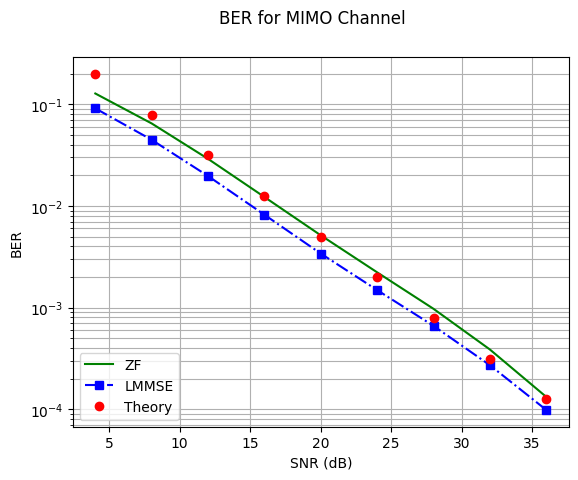

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as nr
import numpy.linalg as nl
from scipy.special import comb

#function to return the hermitian of a matrix
def HERM(G):
    return np.conj(np.transpose(G));
#function to return Ahermitian*A
def AHA(A):
    return np.matmul(HERM(A),A)

blockLength = 1000; # number of symbols per block
nBlocks = 10000; # number of blocks
r = 2; # Number of receive antennas
t = 2; # number of transmit antennas
EbdB = np.arange(1.0,33.1,4.0); # Energy per bit in dB
Eb = 10**(EbdB/10); # Energy per bit
No = 1; # Complex noise power No
Es = 2*Eb; # Energy per symbol Eb
SNR = Es/No; # Signal-to-noise power ratio SNR
SNRdB = 10*np.log10(SNR); # SNR in dB
BER_ZF = np.zeros(len(EbdB)); # Bit error rate for ZF receiver
BER_LMMSE = np.zeros(len(EbdB)); # Bit error rate for LMMSE receiver
BERt = np.zeros(len(EbdB)); # Bit error values from formula


for blk in range(nBlocks):
    # MIMO channel matrix
    H = (nr.normal(0.0, 1.0,(r,t))+1j*nr.normal(0.0, 1.0,(r,t)))/np.sqrt(2);
    # Complex Gaussian noise of power No
    noise = nr.normal(0.0, np.sqrt(No/2), (r,blockLength))+ \
    1j*nr.normal(0.0, np.sqrt(No/2), (r,blockLength));
    BitsI = nr.randint(2,size=(t,blockLength)); # Bits for I channel
    BitsQ = nr.randint(2,size=(t,blockLength)); # Bits for Q channel
    Sym = (2*BitsI-1)+1j*(2*BitsQ-1); # Complex QPSK symbols

    for K in range(len(SNRdB)):
        TxSym = np.sqrt(Eb[K])*Sym; # Tx symbols after power scaling
        RxSym = np.matmul(H,TxSym) + noise; # Rx symbols in AWGN

        # ZF Receiver
        ZFRx = nl.pinv(H)#pseudo inverse
        ZFout = np.matmul(ZFRx, RxSym)
        DecBitsI_ZF = (np.real(ZFout)>0)
        DecBitsQ_ZF = (np.imag(ZFout)>0)

        BER_ZF[K] = BER_ZF[K] + np.sum(DecBitsI_ZF != BitsI) + np.sum(DecBitsQ_ZF != BitsQ)

        # LMMSE Receiver



        LMMSERx = np.matmul(nl.inv(AHA(H) + 1/SNR[K]*np.identity(t)), HERM(H))
        LMMSEout = np.matmul(LMMSERx, RxSym)

        DecBitsI_LMMSE = (np.real(LMMSEout)>0)
        DecBitsQ_LMMSE = (np.imag(LMMSEout)>0)

        #Evaluating the total number of bit errors for LMMSE receiver
        BER_LMMSE[K] = BER_LMMSE[K] + np.sum(DecBitsI_LMMSE != BitsI) + np.sum(DecBitsQ_LMMSE != BitsQ)



BER_ZF = BER_ZF/blockLength/nBlocks/2/t; # Average BER for ZF Receiver
BER_LMMSE = BER_LMMSE/blockLength/nBlocks/2/t; # Average BER for LMMSE Receiver
L=r-t+1;    BERt = comb(2*L-1, L)/2**L/SNR**L; # BER for ZF from formulat

# Plot BER of ZF and LMMSE Receivers
plt.yscale('log')
plt.plot(SNRdB, BER_ZF,'g-');
plt.plot(SNRdB, BER_LMMSE,'b-.s');
plt.plot(SNRdB, BERt,'ro');
plt.grid(1,which='both')
plt.suptitle('BER for MIMO Channel')
plt.legend(["ZF","LMMSE", "Theory"], loc ="lower left");
plt.xlabel('SNR (dB)')
plt.ylabel('BER')

#**Observations:**


*   **LMMSE is performing better than Zero Forcing Receiver.**

*   **The BER for LMMSE Receiver is less than ZF and Theoritical.**
